# 作业一
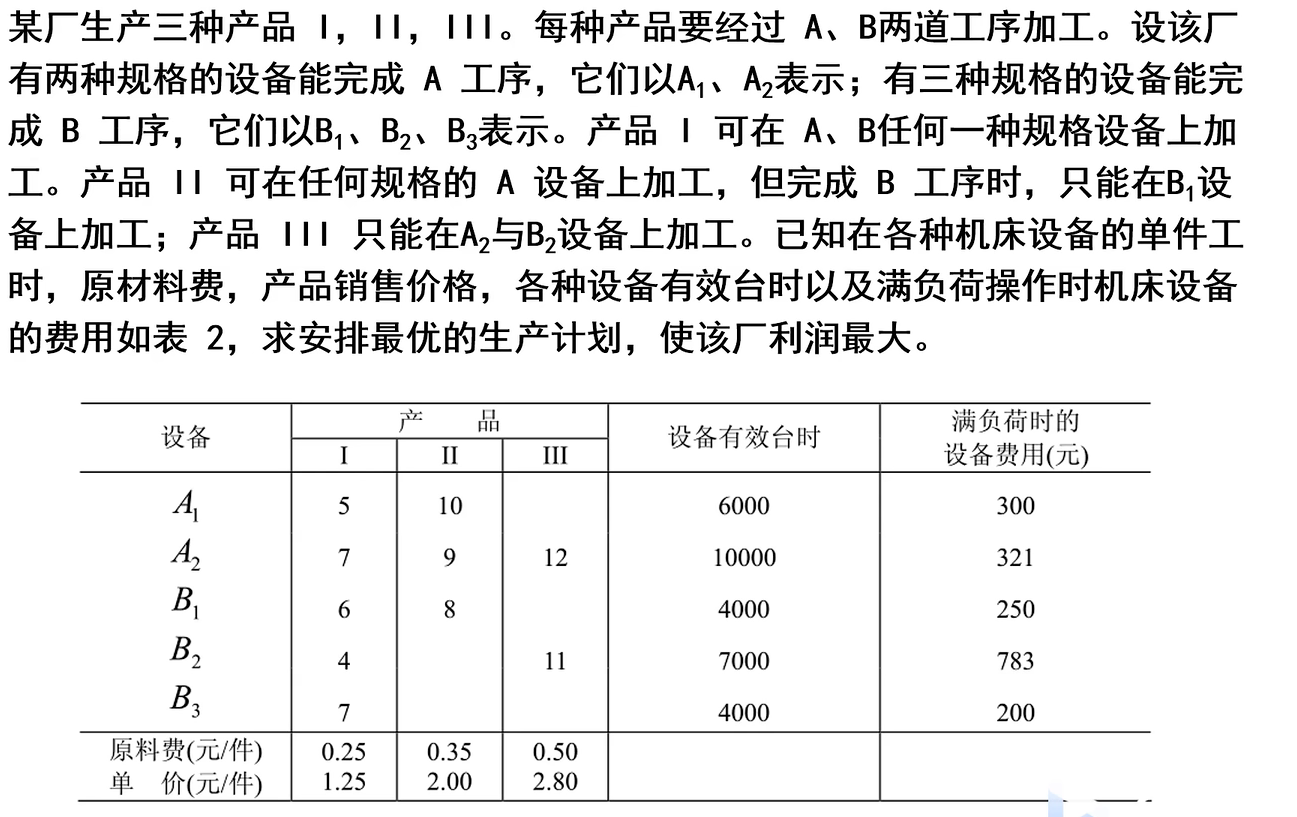\
列出以下线性规划方程
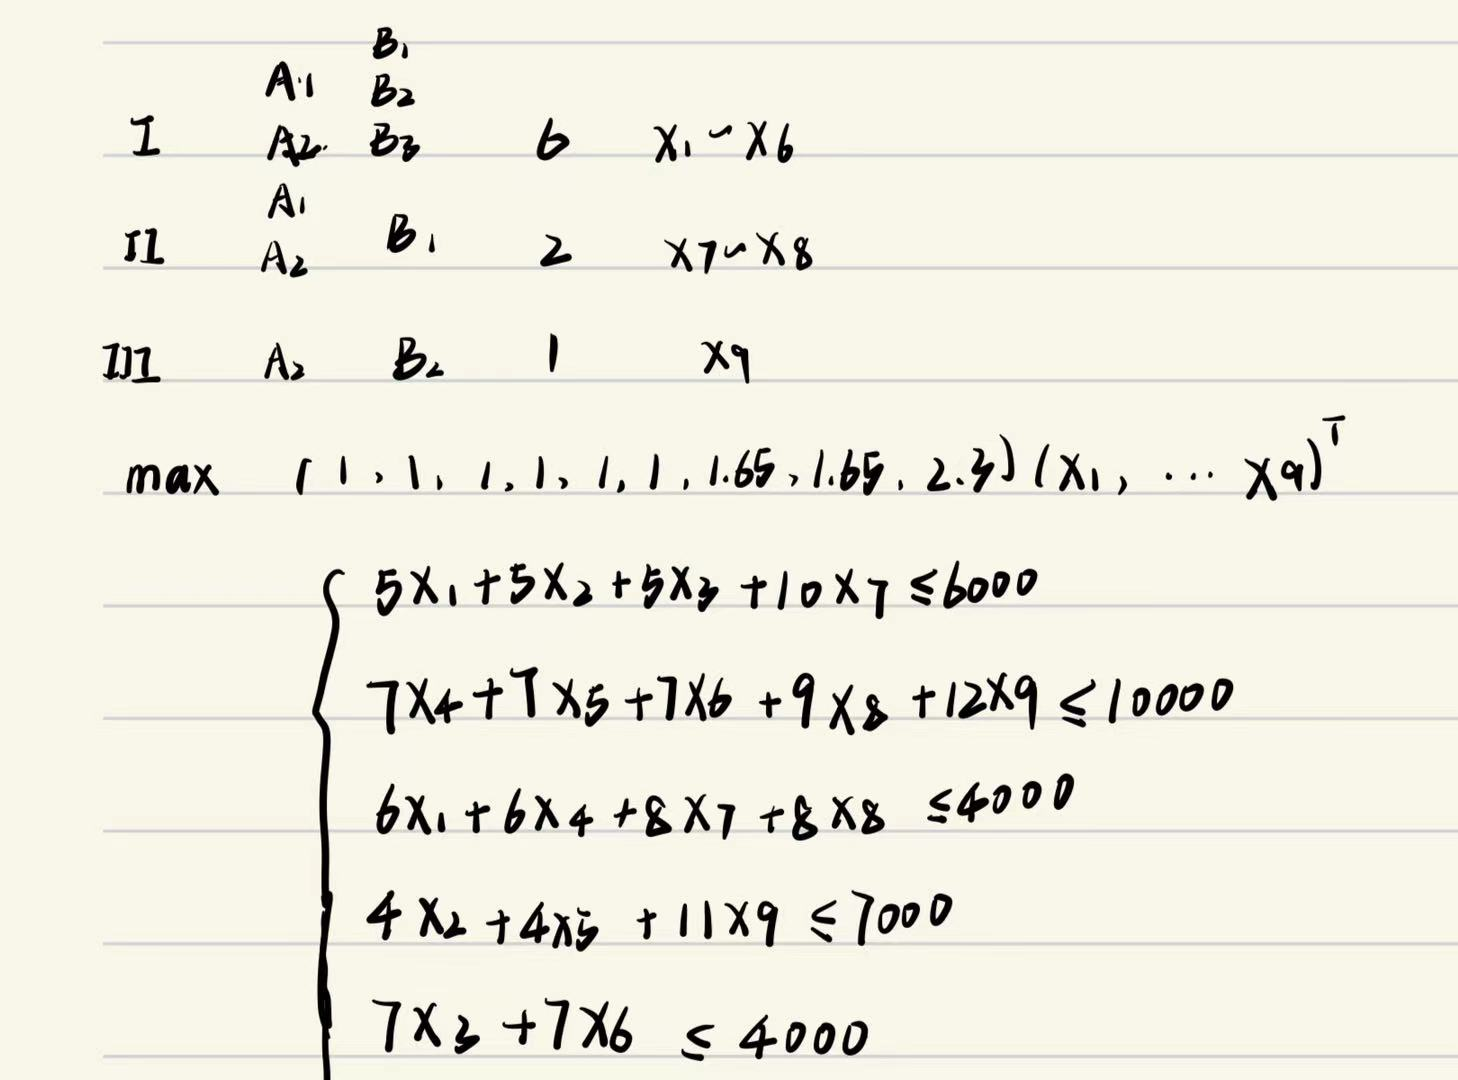

In [12]:
import numpy as np
from scipy import optimize

c = np.array([-1+300/6000*5+250/4000*6,
              -1+300/6000*5+783/7000*4,
              -1+300/6000*5+200/4000*7,
              -1+321/10000*7+250/4000*6,
              -1+321/10000*7+783/7000*4,
              -1+321/10000*7+200/4000*7,
              -1.65+300/6000*10+250/4000*8,
              -1.65+321/10000*9+250/4000*8,
              -2.3+321/10000*12+783/7000*11])
A = np.array([[5,5,5,0,0,0,10,0,0],
             [0,0,0,7,7,7,0,9,12],
             [6,0,0,6,0,0,8,8,0],
             [0,4,0,0,4,0,0,0,11],
             [0,0,7,0,0,7,0,0,0]])
b =np.array([6000,10000,4000,7000,4000])
res = optimize.linprog(c,A,b)
print(-res.fun,res.x)
'''
这题实际上是个整数规划问题,但使用linprog求整数规划比较麻烦,我们使用pulp
'''

1146.566502463054 [  0.         628.57142857 571.42857143   0.         230.04926108
   0.           0.         500.         324.13793103]


'\n这题实际上是个整数规划问题，但使用linprog求整数规划比较麻烦，我们使用pulp\n'

In [14]:
from pulp import *

prob = LpProblem("test1",LpMinimize)  #  问题建立

# 变量定义
x1=LpVariable("I-A1B1",0,None,LpInteger)
x2=LpVariable("I-A1B2",0,None,LpInteger)
x3=LpVariable("I-A1B3",0,None,LpInteger)
x4=LpVariable("I-A2B1",0,None,LpInteger)
x5=LpVariable("I-A2B2",0,None,LpInteger)
x6=LpVariable("I-A2B3",0,None,LpInteger)
x7=LpVariable("II-A1B1",0,None,LpInteger)
x8=LpVariable("II-A2B1",0,None,LpInteger)
x9=LpVariable("III-A2B2",0,None,LpInteger)

# 设置目标函数
prob += (-1+300/6000*5+250/4000*6)*x1+(-1+300/6000*5+783/7000*4)*x2+(-1+300/6000*5+200/4000*7)*x3+(-1+321/10000*7+250/4000*6)*x4+(-1+321/10000*7+783/7000*4)*x5+(-1+321/10000*7+200/4000*7)*x6+(-1.65+300/6000*10+250/4000*8)*x7+(-1.65+321/10000*9+250/4000*8)*x8+(-2.3+321/10000*12+783/7000*11)*x9

# 设置约束函数
prob += 5*x1+5*x2+5*x3+10*x7<=6000
prob += 7*x4+7*x5+7*x6+9*x8+12*x9<=10000
prob += 6*(x1+x4)+8*(x7+x8)<=4000
prob += 4*(x2+x5)+11*x9<=7000
prob += 7*x3+7*x6<=4000
# 求解
prob.solve()
for v in prob.variables():
    print(v.name, "=", v.varValue)
print(value(-prob.objective))

III_A2B2 = 324.0
II_A1B1 = 0.0
II_A2B1 = 500.0
I_A1B1 = 0.0
I_A1B2 = 629.0
I_A1B3 = 571.0
I_A2B1 = 0.0
I_A2B2 = 230.0
I_A2B3 = 0.0
1146.4142
